In [1]:
import sys
sys.path.append('../unseen')

import dask
import xarray as xr

import myfuncs
import indices

## All at once

In [2]:
kwargs = {'metadata_file': '../config/cafe.yml',
          'no_leap_days': True,
          'region': 'TAS-POINT',
          'variables': ['pr'],
          'chunks' : {'time': -1},
         }

# 'units': 'mm/day',

In [3]:
infiles = ['/g/data/xv83/ds0092/CAFE/forecasts/f6/WIP/c5-d60-pX-f6-19911101/ZARR/atmos_isobaric_daily.zarr.zip',
           '/g/data/xv83/ds0092/CAFE/forecasts/f6/WIP/c5-d60-pX-f6-19921101/ZARR/atmos_isobaric_daily.zarr.zip']

ds = myfuncs.open_mfforecast(infiles, **kwargs)

In [4]:
ds['pr']

<xarray.DataArray 'pr' (init_date: 2, lead_time: 3650, ensemble: 96)>
dask.array<concatenate, shape=(2, 3650, 96), dtype=float32, chunksize=(1, 3650, 96), chunktype=numpy.ndarray>
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 ... 3644 3645 3646 3647 3648 3649
  * init_date  (init_date) datetime64[ns] 1991-11-01 1992-11-01
    time       (lead_time, init_date) datetime64[ns] 1991-11-01 ... 2002-10-29
Attributes:
    cell_methods:   time: mean
    interp_method:  conserve_order1
    long_name:      Total precipitation rate
    time_avg_info:  average_T1,average_T2,average_DT
    units:          kg/m2/s

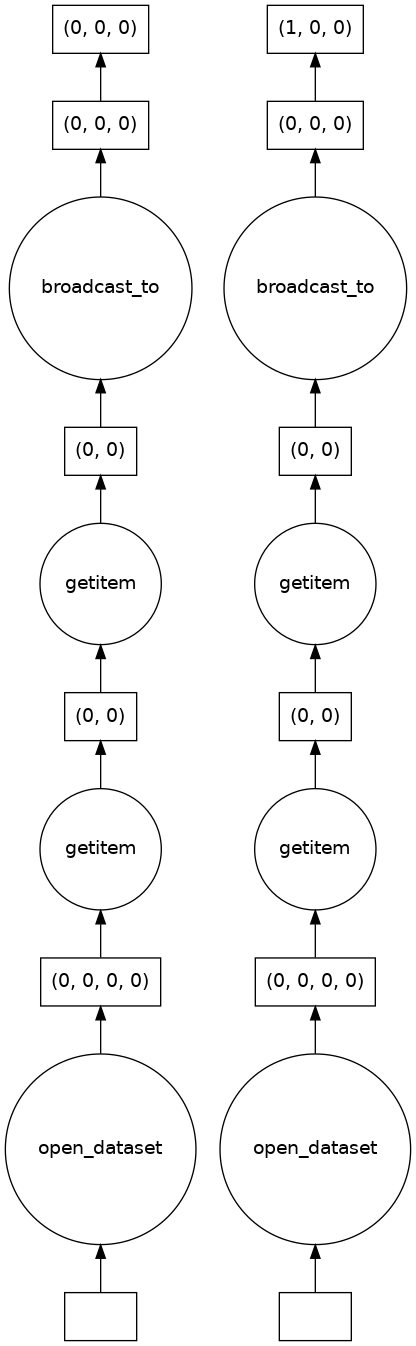

In [5]:
dask.visualize(ds['pr'])

In [ ]:
ds.to_netcdf('/g/data/xv83/dbi599/test.nc', mode='w')

## Partly step-by-step

In [7]:
datasets = []
for infile in infiles:
    ds = myfuncs.open_file(infile, **kwargs)
    ds = myfuncs.to_init_lead(ds)
    datasets.append(ds)
ds = xr.concat(datasets, dim='init_date')

In [8]:
datasets[0]['pr']

<xarray.DataArray 'pr' (lead_time: 3650, ensemble: 96)>
dask.array<getitem, shape=(3650, 96), dtype=float32, chunksize=(27, 96), chunktype=numpy.ndarray>
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 ... 3644 3645 3646 3647 3648 3649
    init_date  datetime64[ns] 1991-11-01
Attributes:
    cell_methods:   time: mean
    interp_method:  conserve_order1
    long_name:      Total precipitation rate
    time_avg_info:  average_T1,average_T2,average_DT
    units:          kg/m2/s

In [9]:
datasets[1]['pr']

<xarray.DataArray 'pr' (lead_time: 3650, ensemble: 96)>
dask.array<getitem, shape=(3650, 96), dtype=float32, chunksize=(27, 96), chunktype=numpy.ndarray>
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 ... 3644 3645 3646 3647 3648 3649
    init_date  datetime64[ns] 1992-11-01
Attributes:
    cell_methods:   time: mean
    interp_method:  conserve_order1
    long_name:      Total precipitation rate
    time_avg_info:  average_T1,average_T2,average_DT
    units:          kg/m2/s

In [10]:
ds['pr']

<xarray.DataArray 'pr' (init_date: 2, lead_time: 3650, ensemble: 96)>
dask.array<concatenate, shape=(2, 3650, 96), dtype=float32, chunksize=(1, 27, 96), chunktype=numpy.ndarray>
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 ... 3644 3645 3646 3647 3648 3649
  * init_date  (init_date) datetime64[ns] 1991-11-01 1992-11-01
Attributes:
    cell_methods:   time: mean
    interp_method:  conserve_order1
    long_name:      Total precipitation rate
    time_avg_info:  average_T1,average_T2,average_DT
    units:          kg/m2/s

## Step-by-step

In [20]:
ds = xr.open_zarr(infiles[0], consolidated=True, use_cftime=True, chunks={'time': -1})

In [21]:
ds['precip']

<xarray.DataArray 'precip' (time: 3653, ensemble: 96, lat: 90, lon: 144)>
dask.array<open_dataset-159737d13b432537b4371d99dbc5fbe2precip, shape=(3653, 96, 90, 144), dtype=float32, chunksize=(3653, 96, 90, 144), chunktype=numpy.ndarray>
Coordinates:
    area        (lat, lon) float32 dask.array<chunksize=(90, 144), meta=np.ndarray>
    average_DT  (time) timedelta64[ns] dask.array<chunksize=(3653,), meta=np.ndarray>
    average_T1  (time) object dask.array<chunksize=(3653,), meta=np.ndarray>
    average_T2  (time) object dask.array<chunksize=(3653,), meta=np.ndarray>
  * ensemble    (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 89 90 91 92 93 94 95 96
  * lat         (lat) float64 -89.49 -87.98 -85.96 -83.93 ... 85.96 87.98 89.49
  * lon         (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time        (time) object 1991-11-01 12:00:00 ... 2001-10-31 12:00:00
    zsurf       (lat, lon) float32 dask.array<chunksize=(90, 144), meta=np.ndarray>
Attributes:
    cell_methods:   time: mean
    interp_method:  conserve_order1
    long_name:      Total precipitation rate
    time_avg_info:  average_T1,average_T2,average_DT
    units:          kg/m2/s

In [22]:
ds = myfuncs.fix_metadata(ds, '../config/cafe.yml', ['pr'])
ds = ds[['pr']]

In [23]:
ds['pr']

<xarray.DataArray 'pr' (time: 3653, ensemble: 96, lat: 90, lon: 144)>
dask.array<open_dataset-159737d13b432537b4371d99dbc5fbe2precip, shape=(3653, 96, 90, 144), dtype=float32, chunksize=(3653, 96, 90, 144), chunktype=numpy.ndarray>
Coordinates:
  * ensemble  (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * lat       (lat) float64 -89.49 -87.98 -85.96 -83.93 ... 85.96 87.98 89.49
  * lon       (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time      (time) object 1991-11-01 12:00:00 ... 2001-10-31 12:00:00
Attributes:
    cell_methods:   time: mean
    interp_method:  conserve_order1
    long_name:      Total precipitation rate
    time_avg_info:  average_T1,average_T2,average_DT
    units:          kg/m2/s

In [24]:
ds = myfuncs.select_region(ds, myfuncs.regions['TAS-POINT'])

In [25]:
ds['pr']

<xarray.DataArray 'pr' (time: 3653, ensemble: 96)>
dask.array<getitem, shape=(3653, 96), dtype=float32, chunksize=(3653, 96), chunktype=numpy.ndarray>
Coordinates:
  * ensemble  (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * time      (time) object 1991-11-01 12:00:00 ... 2001-10-31 12:00:00
Attributes:
    cell_methods:   time: mean
    interp_method:  conserve_order1
    long_name:      Total precipitation rate
    time_avg_info:  average_T1,average_T2,average_DT
    units:          kg/m2/s

In [26]:
ds = ds.sel(time=~((ds['time'].dt.month == 2) & (ds['time'].dt.day == 29)))

In [27]:
ds['pr']

<xarray.DataArray 'pr' (time: 3650, ensemble: 96)>
dask.array<getitem, shape=(3650, 96), dtype=float32, chunksize=(3650, 96), chunktype=numpy.ndarray>
Coordinates:
  * ensemble  (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * time      (time) object 1991-11-01 12:00:00 ... 2001-10-31 12:00:00
Attributes:
    cell_methods:   time: mean
    interp_method:  conserve_order1
    long_name:      Total precipitation rate
    time_avg_info:  average_T1,average_T2,average_DT
    units:          kg/m2/s